___
# Polynomial Regression
___

## Imports

In [143]:
# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.cross_validation import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# backward elimitnation
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLSResults

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

## Exploring the dataset

In [144]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [146]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Text(0.5,1,'HISTOGRAM')

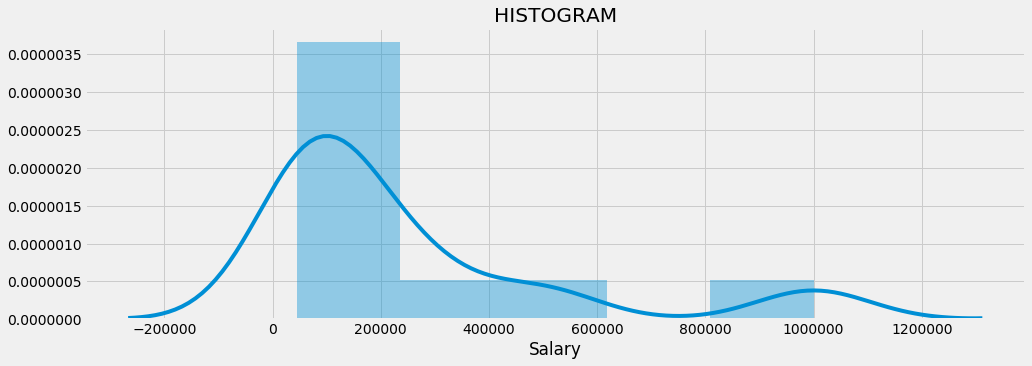

In [147]:
sns.distplot(dataset['Salary'])
plt.title("HISTOGRAM")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


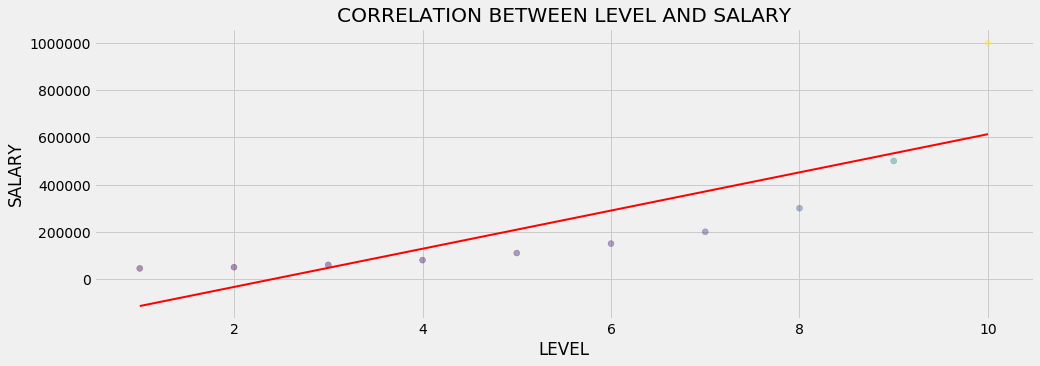

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [148]:
def show_corr(data, ylabel):
    for columnName in data.columns.values.tolist():
        column = data[columnName]
        if column.dtype == "object" or columnName == ylabel:
            continue
        column = column.reshape(-1,1)
        xlabel = columnName.upper()
        y = data[ylabel]
        model = LinearRegression()
        model.fit(column, y)
        predictions =  model.predict(column)
        plt.plot(column, predictions, color='red', linewidth=2)
        plt.scatter(column, y, alpha=0.4, c=y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel.upper())
        plt.title("CORRELATION BETWEEN " + xlabel + " AND " + ylabel.upper())
        plt.show()

show_corr(dataset,"Salary")

dataset.corr()

Text(0.5,1,'CORRELATION')

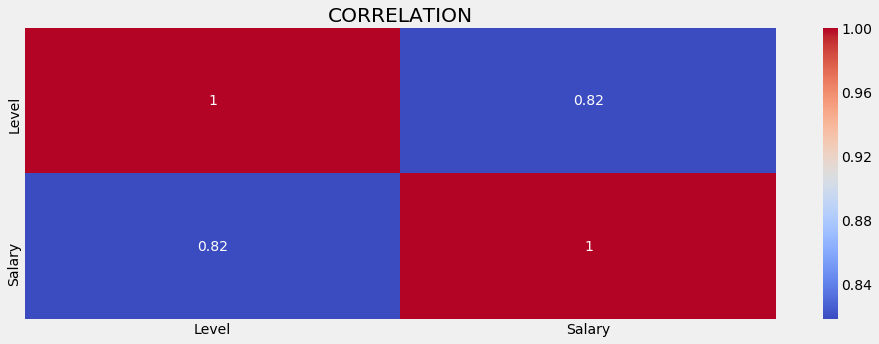

In [149]:
sns.heatmap(data=dataset.corr(),cmap="coolwarm",annot=True)
plt.title("CORRELATION")

## Data Processing

In [150]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

### Splitting the dataset into the Training set and Test set

In [151]:
#dataset in this case is to small
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Creating and Training the model

In [152]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
X_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

In [154]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions

In [155]:
linear_regressor_predictions = linear_regressor.predict(X)
poly_regressor_predictions = poly_regressor.predict(poly_features.fit_transform(X))

## Perfomance

In [156]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def plot_performance_metrics(X, y_true, y_predict, model_name):
    plt.scatter(X,y_true, color='r')
    plt.plot(X, y_predict, color='b')
    
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    score = performance_metric(y_true, y_predict)
    print ("\nThe " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.title("The " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.show()
    
def plot_performance_metrics_poly(X,y, poly_regressor, poly_features, model_name):
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    y_predict = poly_regressor.predict(poly_features.fit_transform(X_grid))
    plt.plot(X_grid, y_predict, color = 'blue')
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    score = performance_metric(y,  poly_regressor.predict(poly_features.fit_transform(X)))
    print ("\nThe " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.title("The " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.show()



The Linear Regression model R^2, is 0.669.


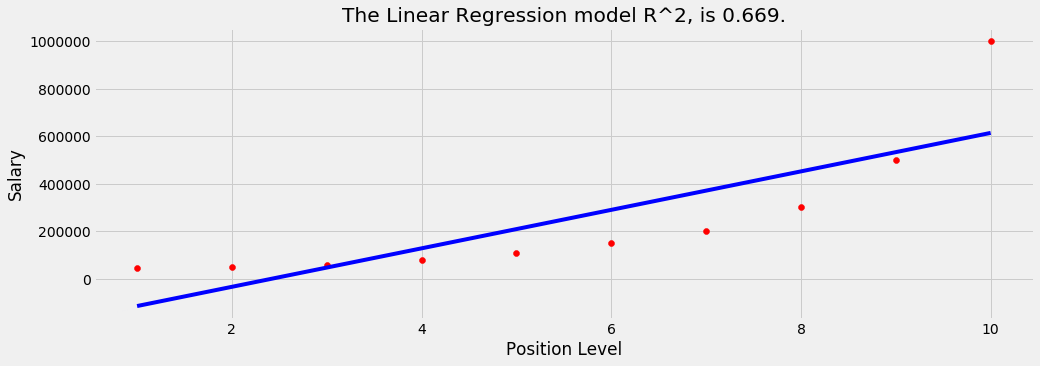

In [157]:
plot_performance_metrics(X,y, linear_regressor_predictions, "Linear Regression")


The Polynomial Regressor model R^2, is 0.997.


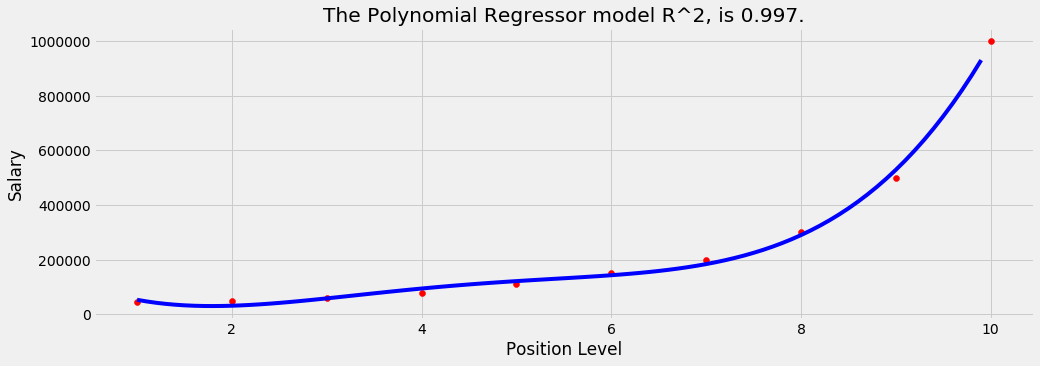

In [158]:
plot_performance_metrics_poly(X,y,poly_regressor,poly_features, "Polynomial Regressor")

In [159]:
poly_regressor.predict(poly_features.fit_transform(6.5))[0]

158862.45265152561

In [160]:
linear_regressor.predict(6.5)[0]

330378.7878787879